In [8]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [9]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

*Note: You are not expected to understand all the computer coding presented with the solutions. You should understand the mathematical concepts and be able to recover the results. We present the computer code so you can learn coding tricks (e.g. read data, compute useful values, fit and plot data) should you be interested.*

# Chapter 1 - Problem Sheet

### Residential neighbourhoud traffic analysis

## Problem 1

### Measures of central tendency and dispersion

#### Task 1

Mean:
\begin{eqnarray}
    \langle x \rangle &=& \frac{1}{N} \sum_{i=1}^{N} x_i \\
                      &=& \frac{1}{10} \left( 0.88 + 20.4 + 14.8 + \dots + 0.12 \right) \\
                      &=& 18.65
\end{eqnarray}

#### Task 2

Geometric mean:

\begin{eqnarray}
    {\rm GM} &=& \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}} = \exp \left[ \frac{1}{N} \sum_{i=1}^{N} \ln x_i \right] \\
             &=& \exp \left[ \frac{1}{10} \left( \ln\left(0.88\right) + \ln\left(20.4\right) + \ln\left(14.8\right) + \dots + \ln\left(0.12\right) \right) \right] \\
             &=& 5.05
\end{eqnarray}

#### Task 3

Harmonic mean:
\begin{eqnarray}
    H &=& \frac{N}{\sum_{i=1}^{N} \frac{1}{x_i}} \\
      &=& \frac{11}{\frac{1}{0.88} + \frac{1}{20.4} + \frac{1}{14.8} + \dots + \frac{1}{0.12} } \\
      &=& 0.75
\end{eqnarray}

#### Task 4

Root mean square:
\begin{eqnarray}
    {\rm RMS} &=& \sqrt{\frac{\sum_{i=1}^{N} x_i^2}{N}} \\
              &=& \sqrt{\frac{0.88^2 + 20.4^2 + 14.8^2 + \dots + 0.12^2}{10}} \\
              &=& 27.49
\end{eqnarray}

#### Task 5

The median:

First we order the elements: $\{0.12, 0.38, 0.88, 1.1, 8.3, 14.8, 20.4, 38.0, 42.5, 60.0\}$

Given that there are 10 elements (i.e. odd number), we take the average of the 5th and 6th element: $\frac{(8.3 + 14.8)}{2} = 11.55$.

#### Task 6

The uncorrected standard deviation:
\begin{eqnarray}
    \sigma &=& \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2} \\
           &=& \sqrt{\frac{1}{10} \left( (0.88-18.65)^2 + (20.4-18.65)^2 + (14.8-18.65)^2 + \dots + (0.12-18.65)^2 \right)} \\
           &=& 20.20
\end{eqnarray}

## Problem 2

### Binned data

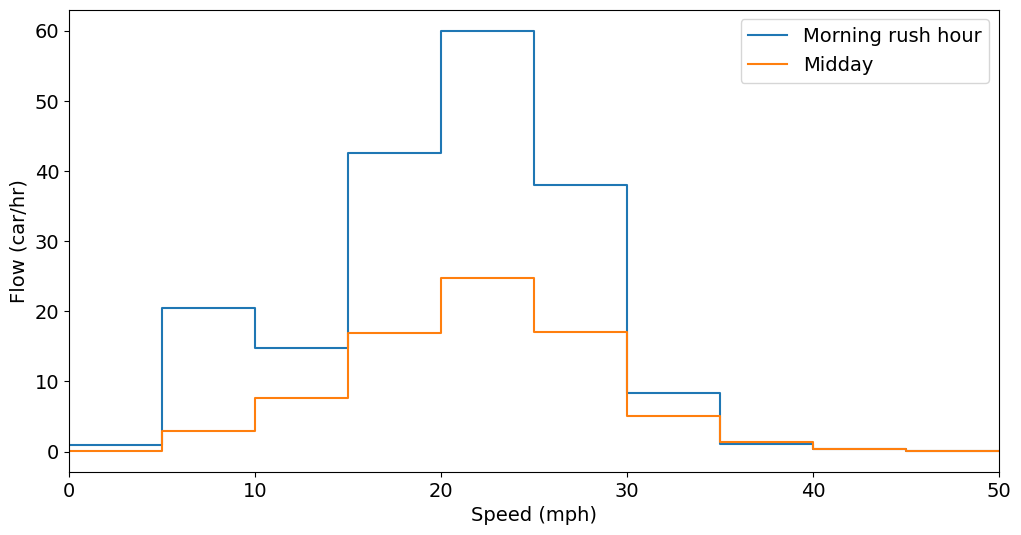

In [10]:
vel = np.r_[ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5]
flow_rush = np.r_[ 0.88, 20.4, 14.8, 42.5, 60., 38., 8.3, 1.1, 0.38, 0.12]
flow_midday = np.r_[0.12, 2.9, 7.6, 16.9, 24.8, 17.1, 5.1, 1.4, 0.3, 0.12]

fig, ax = plt.subplots(figsize=(12,6))
x = np.r_[0.,vel,50.]
y = np.r_[flow_rush[0],flow_rush,flow_rush[-1]]
ax.plot(x, y, drawstyle='steps-mid', label='Morning rush hour')
y = np.r_[flow_midday[0],flow_midday,flow_midday[-1]]
ax.plot(x, y, drawstyle='steps-mid', label='Midday')
ax.set_xlim(0,50)
ax.set_xlabel('Speed (mph)')
ax.legend()
_ = ax.set_ylabel('Flow (car/hr)')

#### Task 1

The average speed requires to do the weighted mean of the speeds -- we will use the mid-point value -- with the flow values being the weights:

\begin{eqnarray}
  \langle v \rangle &=& \frac{ \sum_{j=1}^{J} n_j v_j }{ \sum_{j=1}^{J} n_j } \\
                    &=& \frac{ (0.88 \times 2.5) + (20.4 \times 7.5) + (14.8 \times 12.5) + \dots (0.12 \times 47.5) }{0.88 + 20.4 + 14.8 + \dots + 0.12} \\
                    &=& 20.44
\end{eqnarray}

#### Task 2

The mode is the most likely value of the speed: 22.5 mph (i.e. bin 20-25 mph).

#### Task 3

The median speed is the speed at which the probability (i.e. area) to the left equals that to the right.

The total area is proportional to the sum of the flow: $0.88 + 20.4 + 14.8 + \dots + 0.12 = 186.48$.

We can sum the flow from the leftmost bin, until we reach a value $186.48/2 = 93.24$. The sum of the first 4 give $78.58$. The sum of the first 5 gives $138.58$. Therefore, the median speed somewhere between bin 4 and 5, which is **about 20 mph**.

## Problem 3

### Multiple variables

#### Task 1

We calculated the standard deviation of the flow at the morning rush hour in Problem 1, so we can get the variance easily: $\sigma_x^2 = 20.20^2 = 408.04$. The same quantity for the midday flow is: $\sigma_y^2 = 8.39^2 = 70.39$.

We also need the average flows: $\langle x \rangle = 18.65$, $\langle y \rangle = 7.63$.

The covariance of the two variables is:
\begin{eqnarray}
    \operatorname{cov}(x,y) = \operatorname{cov}(y,x) &=& \frac{1}{N} \sum_{i=1}^N (x_i - \langle x \rangle)(y_i - \langle y \rangle) \\
                            &=& \frac{1}{10} \left( (0.88-18.65)(0.12-7.63) + (20.4-18.65)(2.9-7.63) + \dots (0.12-18.65)(0.12-7.63) \right) \\
                            &=& 164.82
\end{eqnarray}

The covariance matrix is:
\begin{eqnarray}
  \Sigma_{x,y} &=& 
  \begin{bmatrix}
     \sigma_{x}^2 & \operatorname{cov}(x,y) \\
     \operatorname{cov}(y,x) & \sigma_{y}^2
  \end{bmatrix} \\
   &=& 
  \begin{bmatrix}
     408.04 & 164.82 \\
     164.82 & 70.39
  \end{bmatrix}
\end{eqnarray}

#### Task 2

Correlation coefficient:

\begin{eqnarray}
    \rho &=& \frac{\operatorname{cov}(x,y)}{\sigma_x \sigma_y} \\
         &=& \frac{164.82}{20.20 \times 8.39} \\
         &=& 0.97
\end{eqnarray}

<div class="opt_start">
    ⬇︎ Optional Questions ⬇︎
</div>

## Problem 4

### Case study: The importance of data visualisation

Consider the data below formed of four datasets, each comprising 11 (x,y) pairs.

In [11]:
## Reading the Anscombe Quartet data an putting them in an array

from io import StringIO
c = StringIO("""
Ix  ,     Iy,   IIx,   IIy,  IIIx,   IIIy,   IVx,   IVy
10.0,  8.04 ,  10.0,  9.14,  10.0,  7.46 ,  8.0 ,  6.58 
8.0 ,  6.95 ,  8.0 ,  8.14,  8.0 ,  6.77 ,  8.0 ,  5.76 
13.0,  7.58 ,  13.0,  8.74,  13.0,  12.74,  8.0 ,  7.71 
9.0 ,  8.81 ,  9.0 ,  8.77,  9.0 ,  7.11 ,  8.0 ,  8.84 
11.0,  8.33 ,  11.0,  9.26,  11.0,  7.81 ,  8.0 ,  8.47 
14.0,  9.96 ,  14.0,  8.10,  14.0,  8.84 ,  8.0 ,  7.04 
6.0 ,  7.24 ,  6.0 ,  6.13,  6.0 ,  6.08 ,  8.0 ,  5.25 
4.0 ,  4.26 ,  4.0 ,  3.10,  4.0 ,  5.39 ,  19.0,  12.50
12.0,  10.84,  12.0,  9.13,  12.0,  8.15 ,  8.0 ,  5.56 
7.0 ,  4.82 ,  7.0 ,  7.26,  7.0 ,  6.42 ,  8.0 ,  7.91 
5.0 ,  5.68 ,  5.0 ,  4.74,  5.0 ,  5.73 ,  8.0 ,  6.89
""")
data = np.genfromtxt(c, delimiter=',', names=True)

apy.table.Table(data).pprint()

 Ix    Iy  IIx  IIy  IIIx  IIIy IVx  IVy 
---- ----- ---- ---- ---- ----- ---- ----
10.0  8.04 10.0 9.14 10.0  7.46  8.0 6.58
 8.0  6.95  8.0 8.14  8.0  6.77  8.0 5.76
13.0  7.58 13.0 8.74 13.0 12.74  8.0 7.71
 9.0  8.81  9.0 8.77  9.0  7.11  8.0 8.84
11.0  8.33 11.0 9.26 11.0  7.81  8.0 8.47
14.0  9.96 14.0  8.1 14.0  8.84  8.0 7.04
 6.0  7.24  6.0 6.13  6.0  6.08  8.0 5.25
 4.0  4.26  4.0  3.1  4.0  5.39 19.0 12.5
12.0 10.84 12.0 9.13 12.0  8.15  8.0 5.56
 7.0  4.82  7.0 7.26  7.0  6.42  8.0 7.91
 5.0  5.68  5.0 4.74  5.0  5.73  8.0 6.89


## Solution 4

The data presented in this problem constitute what is known as Anscombe's Quartet.

```
Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to attack the impression among statisticians that "numerical calculations are exact, but graphs are rough.
```

[Anscombe Quartet (Wikipedia)](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

### Tasks 1, 2 and 3

#### Example calculations
Here is a sample calculation for the first dataset:

Arithmetic mean:
\begin{eqnarray}
  \langle I_x \rangle &=& \frac{1}{N} \sum_{i=1}^{N} I_{x,i} \\
                      &=& \frac{1}{11} \left( 10.0 + 8.0 + 13.0 + \dots + 5.0 \right) = 9.00
\end{eqnarray}

Uncorrected standard deviation:
\begin{eqnarray}
  \sigma_{I_x, {\rm uncorr}} &=& \left[ \frac{1}{N} \sum_{i=1}^N (I_{x,i} - \langle x \rangle)^2 \right]^{1/2} \\
                        &=& \left[ \frac{1}{11} \left( (10.0-9.0)^2 + (8.0-9.0)^2 + (13.0-9.0)^2 + \dots + (5.0-9.0)^2 \right) \right]^{1/2} = 3.16
\end{eqnarray}

The correlation coefficient requires us to determine the covariance, given as:
\begin{eqnarray}
  \operatorname{cov}(I_x,I_y) &=& \frac{1}{N} \sum_{i=1}^N (I_{x,i} - \langle I_x \rangle)(I_{y,i} - \langle I_y \rangle) \\
                              &=& \frac{1}{11} \left( (10.0-9.0) (8.04-9.0) + (8.0-9.0) (6.95-9.0) + \dots (5.0-9.0) (5.68-9.0) \right) = 5.0
\end{eqnarray}

*Note that above we use the uncorrected version of the covariance as we will use the uncorrected standard deviation and the denominator as well.*

Therefore, the correlation coefficient is:
\begin{eqnarray}
  \rho_{(x,y)} &=& \frac{\operatorname{cov}(I_x,I_y)}{\sigma_{I_x, {\rm uncorr}} \sigma_{I_y, {\rm uncorr}}} \\
               &=& \frac{5.0}{3.16 \cdot 1.94} = 0.82
\end{eqnarray}

#### Numerical answers

In [12]:
print('Mean of x:')
print('Ix: {:.2f},  IIx: {:.2f}, IIIx: {:.2f}, IVx: {:.2f}'.format(data['Ix'].mean(),data['IIx'].mean(),data['IIIx'].mean(),data['IVx'].mean()))
print('')

print('Uncorrected sample standard deviation of x:')
print('Ix: {:.2f},  IIx: {:.2f}, IIIx: {:.2f}, IVx: {:.2f}'.format(data['Ix'].std(),data['IIx'].std(),data['IIIx'].std(),data['IVx'].std()))
print('')

print('Mean of y:')
print('Iy: {:.2f},  IIy: {:.2f}, IIIy: {:.2f}, IVy: {:.2f}'.format(data['Iy'].mean(),data['IIy'].mean(),data['IIIy'].mean(),data['IVy'].mean()))
print('')

print('Uncorrected sample standard deviation of y:')
print('Iy: {:.2f},  IIy: {:.2f}, IIIy: {:.2f}, IVy: {:.2f}'.format(data['Iy'].std(),data['IIy'].std(),data['IIIy'].std(),data['IVy'].std()))
print('')

print('Correlation between x and y:')
print('I: {:.2f},  II: {:.2f}, III: {:.2f}, IV: {:.2f}'.format(np.corrcoef(data['Ix'],data['Iy'])[0,1], np.corrcoef(data['Ix'],data['Iy'])[0,1], np.corrcoef(data['Ix'],data['Iy'])[0,1], np.corrcoef(data['Ix'],data['Iy'])[0,1]))

Mean of x:
Ix: 9.00,  IIx: 9.00, IIIx: 9.00, IVx: 9.00

Uncorrected sample standard deviation of x:
Ix: 3.16,  IIx: 3.16, IIIx: 3.16, IVx: 3.16

Mean of y:
Iy: 7.50,  IIy: 7.50, IIIy: 7.50, IVy: 7.50

Uncorrected sample standard deviation of y:
Iy: 1.94,  IIy: 1.94, IIIy: 1.94, IVy: 1.94

Correlation between x and y:
I: 0.82,  II: 0.82, III: 0.82, IV: 0.82


### Task 4

#### Bonus: fitting a straight line

We want to fit a line, $y = mx + b$, through the data. This can be done **analytically**! (see *Data Analysis, Semester 1*)

We can rewrite this equation as $\underline{y} = \underline{\underline{A}} \cdot \underline{p}$, where:

$\underline{y}$ is a n-element column vector with elements $y_i$,

$\underline{\underline{A}}$ is a $n \times 2$ matrix with elements defined as $A_{ij}= [[x_i \quad 1]]$, and 

$\underline{p}$ is a 2-element column vector with elements defined as $p_j = [m, b]$.

*We can solve this system of linear equations using [_np.linalg.lstsq_](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html). Note that numpy offers other ways of fitting a straight line, especially if there are uncertainties, and it is also possible to use the analytical derivation and code it by hand.*

In [13]:
A = np.vstack([data['Ix'], np.ones(11)]).T
y = data['Iy']
print('y(i):')
print(y)
print('')

print('A(i,j):')
print(A)
print('')

m_1, b_1 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set I):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

A = np.vstack([data['IIx'], np.ones(11)]).T
y = data['IIy']
m_2, b_2 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set II):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

A = np.vstack([data['IIIx'], np.ones(11)]).T
y = data['IIIy']
m_3, b_3 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set III):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

A = np.vstack([data['IVx'], np.ones(11)]).T
y = data['IVy']
m_4, b_4 = np.linalg.lstsq(A, y, rcond=None)[0]
print('Fit result (set IV):')
print('  m: {:.3f}, b: {:.3f}'.format(m_1,b_1))
print('')

y(i):
[ 8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68]

A(i,j):
[[10.  1.]
 [ 8.  1.]
 [13.  1.]
 [ 9.  1.]
 [11.  1.]
 [14.  1.]
 [ 6.  1.]
 [ 4.  1.]
 [12.  1.]
 [ 7.  1.]
 [ 5.  1.]]

Fit result (set I):
  m: 0.500, b: 3.000

Fit result (set II):
  m: 0.500, b: 3.000

Fit result (set III):
  m: 0.500, b: 3.000

Fit result (set IV):
  m: 0.500, b: 3.000



#### Plot of the datasets

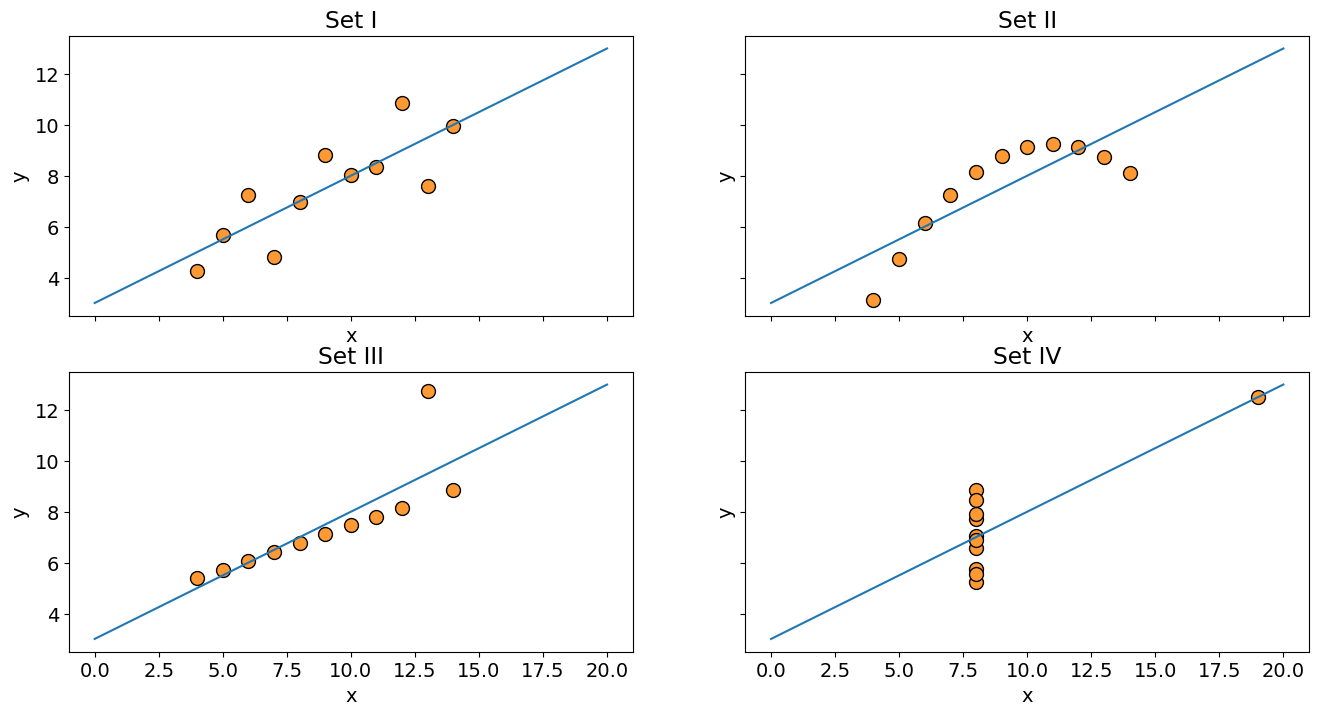

In [14]:
## Generating the subplots
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,8))

## Picking the color at https://www.w3schools.com/colors/colors_picker.asp
_ = ax[0,0].scatter(data['Ix']  , data['Iy']  , s=100, c='#ff9933', edgecolors='k')
_ = ax[0,1].scatter(data['IIx'] , data['IIy'] , s=100, c='#ff9933', edgecolors='k')
_ = ax[1,0].scatter(data['IIIx'], data['IIIy'], s=100, c='#ff9933', edgecolors='k')
_ = ax[1,1].scatter(data['IVx'] , data['IVy'] , s=100, c='#ff9933', edgecolors='k')
_ = ax[0,0].set_xlabel('x')
_ = ax[0,1].set_xlabel('x')
_ = ax[1,0].set_xlabel('x')
_ = ax[1,1].set_xlabel('x')
_ = ax[0,0].set_ylabel('y')
_ = ax[0,1].set_ylabel('y')
_ = ax[1,0].set_ylabel('y')
_ = ax[1,1].set_ylabel('y')
_ = ax[0,0].set_title('Set I'  )
_ = ax[0,1].set_title('Set II' )
_ = ax[1,0].set_title('Set III')
_ = ax[1,1].set_title('Set IV' )

## We add the best fit
x = np.arange(21.)
_ = ax[0,0].plot(x, m_1*x+b_1)
_ = ax[0,1].plot(x, m_2*x+b_2)
_ = ax[1,0].plot(x, m_3*x+b_3)
_ = ax[1,1].plot(x, m_4*x+b_4)

## We save the figure
#fig.savefig('./images/anscombe_plot.pdf')

### Task 5

The first lesson to learn is that while various types of measure to describe datasets might all agree with each other, the underlying data can be very different. There is no miracle solution to get around this issue but visualising with a plot can be very insightful. The task can get more tricky for very large datasets and/or large number of dimensions.

The second lesson is that blindly fitting data with a model can be dangerous. Using the right underlying model (i.e. the right *physics* as is often our case) is crucial and can be guided by visualisation. For instance, a further calculation reveals that all of the above plots have the same chi-squared ($\chi^2$) value.

<div class="opt_end">
    ⬆︎ Optional Questions ⬆︎
</div>

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>